In [0]:
!wget https://www.dropbox.com/s/56t735t8ucpcmd2/data.zip?dl=0

--2019-12-24 10:57:33--  https://www.dropbox.com/s/56t735t8ucpcmd2/data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/56t735t8ucpcmd2/data.zip [following]
--2019-12-24 10:57:33--  https://www.dropbox.com/s/raw/56t735t8ucpcmd2/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd16a4501bc2074c4f6eeb13393.dl.dropboxusercontent.com/cd/0/inline/Au08ZdjfPNRKgVZ4isWwuB_ipgr3OwqWv5XQzn5hoaro4AqIl44PbFcsl6Zk5P6TEUCR2XY8A0-J04FEvHCuywLq2wR6_hhD7ZFVyC8SXFPqyV8CWvoDyu0lWXyfpFktboE/file# [following]
--2019-12-24 10:57:34--  https://ucd16a4501bc2074c4f6eeb13393.dl.dropboxusercontent.com/cd/0/inline/Au08ZdjfPNRKgVZ4isWwuB_ipgr3OwqWv5XQzn5hoaro4AqIl44PbFcsl6Zk5P6TEUCR2XY8A0-J04FEvHCuywLq2wR6_hhD7ZFVyC8SXFPqyV8CWvoDyu

In [0]:
!unzip data.zip?dl=0 

Archive:  data.zip?dl=0
  inflating: fer2013 - Copy.csv      


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv('data.csv')
print(data.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [0]:
X_train=data.loc[data['Usage']=='Training']

In [0]:
X_test=data.loc[data['Usage']=='PublicTest']

In [0]:
print(X_train.shape,X_test.shape)

(28709, 3) (3589, 3)


In [0]:
X_train=X_train.values
X_test=X_test.values

In [0]:
Y_train=X_train[:,0]
Y_test=X_test[:,0]

In [0]:
X_train=X_train[:,1]
print(X_train.shape,Y_train.shape)

(28709,) (28709,)


In [0]:
X_test=X_test[:,1]
print(X_test.shape,Y_test.shape)

(3589,) (3589,)


In [0]:
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
def convertor(img):
    img=np.array(img.split(' '))
    img=img.reshape((48,48))
    image=np.zeros((48,48,1))
    image[:,:,0]=img
    image[:,:,0]=img
    image[:,:,0]=img
    return np.array(image)   

In [0]:
# anger, disgust, fear, happiness, sadness, surprise, and neutral.
label_dict={0:'anger',1:'disgust',2:'fear',3:'happiness',4:'sadness',5:'surprise',6:'neutral'}

In [0]:
def readImg(img,label):
    plt.style.use('seaborn')
    plt.axis('off')
    plt.title(label)
    plt.imshow(img)
    #plt.legend()
    plt.show()

In [0]:
for i in range(X_train.shape[0]):
    X_train[i]=convertor(X_train[i])

In [0]:
print(X_train[100].shape)
#readImg(X_train[100],label_dict[Y_train[100]])

(48, 48, 1)


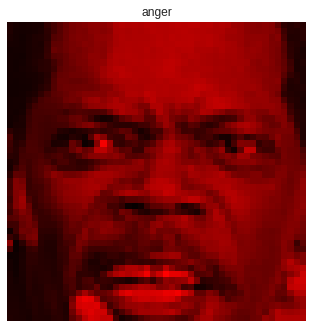

In [0]:
readImg(X_train[10]/255.0,label_dict[Y_train[10]])

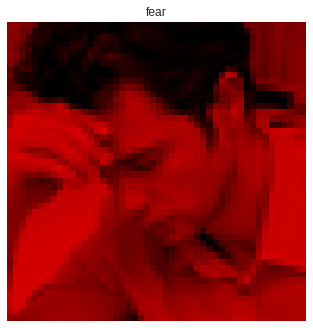

In [0]:
readImg(X_train[200]/255.0,label_dict[Y_train[200]])

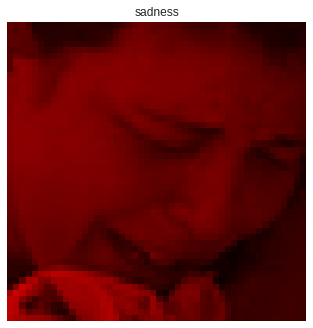

In [0]:
readImg(X_train[350]/255.0,label_dict[Y_train[350]])

In [0]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam

In [0]:
model=Sequential()

In [0]:
import warnings
warnings.filterwarnings('ignore')
# adding Ist Convolutional layer
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1),padding='same'))
#model.add(MaxPooling2D((2,2)))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th",padding='same'))
model.add(Dropout(0.25))
# adding second convolutional layer
model.add(Conv2D(128,(5,5),activation='relu',padding='same'))
#model.add(MaxPooling2D((2,2)))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th",padding='same'))
model.add(Dropout(0.25))
# adding third convolutional layer
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D((2,2)))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th",padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D((2,2)))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th",padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D((2,2)))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th",padding='same'))
model.add(Dropout(0.25))
# flattening
model.add(Flatten())
# adding dense layers
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))
model.summary()











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 24, 128)       102528    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 12, 64)        0     

In [0]:
adam=Adam(lr=0.0001)

In [0]:
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['acc'])

In [0]:
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint=ModelCheckpoint('best_model.h5',save_best_only=True,mode=max,verbose=1,monitor='val_loss')
early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1,mode='min',restore_best_weights=True)
callback=[checkpoint,early_stop]

In [0]:
X_trains=[]
for i in range(X_train.shape[0]):
    X_trains.append(X_train[i])

In [0]:
X_trains=np.array(X_trains)
print(X_trains.shape)

(28709, 48, 48, 1)


In [0]:
for i in range(X_test.shape[0]):
    X_test[i]=convertor(X_test[i])

In [0]:
X_tests=[]
for i in range(X_test.shape[0]):
    X_tests.append(X_test[i])

In [0]:
X_tests=np.array(X_tests)
print(X_tests.shape)

(3589, 48, 48, 1)


In [0]:
#history=model.fit(X_trains,Y_train,validation_split=0.2,batch_size=128,epochs=100,shuffle=True,callbacks=callback)

In [0]:
data_gen=image.ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,rotation_range=30,
                                  horizontal_flip=True,fill_mode='nearest')

In [0]:
train_generator=data_gen.fit(X_trains)

In [0]:
validation_generator=data_gen.fit(X_tests)

In [0]:
hist=model.fit_generator(data_gen.flow(X_trains,Y_train,batch_size=128),steps_per_epoch=X_trains.shape[0]//128,
                         validation_data=(X_tests,Y_test),
                         epochs=200,callbacks=callback)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
224/224 [==============================] - 25s 109ms/step - loss: 3.1409 - acc: 0.2230 - val_loss: 1.9076 - val_acc: 0.2494

Epoch 00001: val_loss improved from inf to 1.90758, saving model to best_model.h5
Epoch 2/200
224/224 [==============================] - 17s 74ms/step - loss: 1.8312 - acc: 0.2411 - val_loss: 1.8974 - val_acc: 0.2494

Epoch 00002: val_loss improved from 1.90758 to 1.89737, saving model to best_model.h5
Epoch 3/200
224/224 [==============================] - 17s 74ms/step - loss: 1.8231 - acc: 0.2500 - val_loss: 1.8613 - val_acc: 0.2494

Epoch 00003: val_loss improved from 1.89737 to 1.86132, saving model to best_model.h5
Epoch 4/200
224/224 [==============================] - 17s 75ms/step - loss: 1.8150 - acc: 0.2489 - val_loss: 1.8490 - val_acc: 0.2524

Epoch 00004: val_loss improved from 1.86132 to 1.84902, saving model to best_model.h5
Epoch 5/200
224/224

In [0]:
preds=model.predict_classes(X_tests)

predicted : happiness


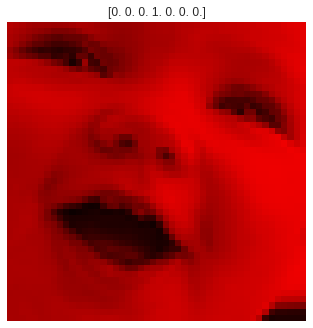

In [0]:
print('predicted : '+ str(label_dict[preds[10]]))
readImg(X_tests[10]/255.0,Y_test[10])

predicted : anger


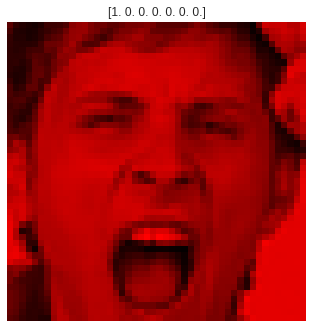

In [0]:
print('predicted : '+ str(label_dict[preds[11]]))
readImg(X_tests[11]/255.0,Y_test[11])

predicted : surprise


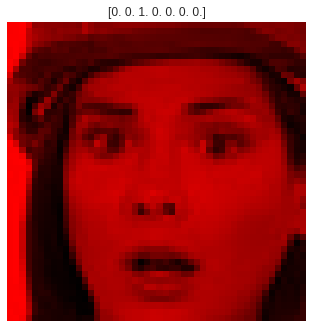

In [0]:
print('predicted : '+ str(label_dict[preds[29]]))
readImg(X_tests[29]/255.0,Y_test[29])

predicted : happiness


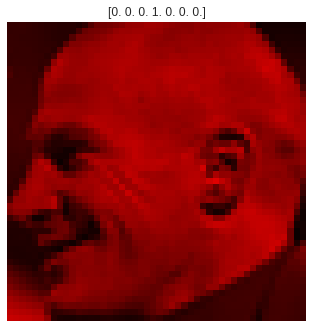

In [0]:
print('predicted : '+ str(label_dict[preds[45]]))
readImg(X_tests[45]/255.0,Y_test[45])

predicted : sadness


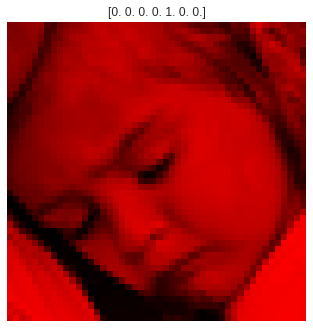

In [0]:
print('predicted : '+ str(label_dict[preds[23]]))
readImg(X_tests[23]/255.0,Y_test[23])

predicted : happiness


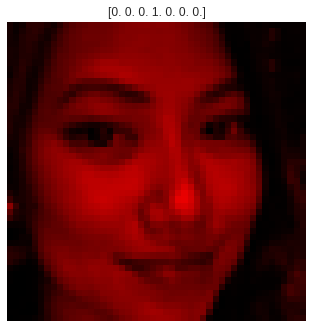

In [0]:
print('predicted : '+ str(label_dict[preds[19]]))
readImg(X_tests[19]/255.0,Y_test[19])

predicted : happiness


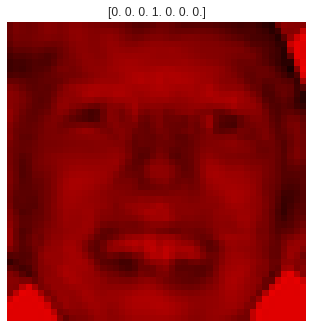

In [0]:
print('predicted : '+ str(label_dict[preds[39]]))
readImg(X_tests[39]/255.0,Y_test[39])

predicted : happiness


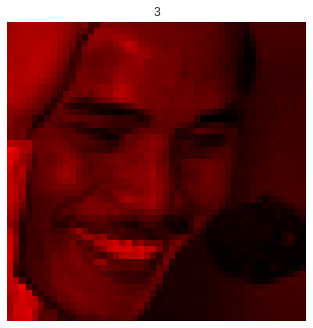

In [0]:
print('predicted : '+ str(label_dict[preds[59]]))
readImg(X_tests[59]/255.0,Y_test[59])

predicted : anger


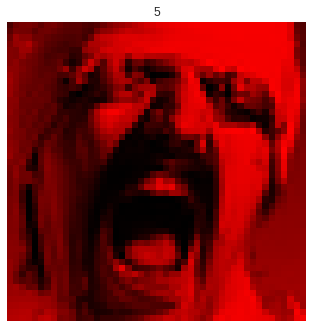

In [0]:
print('predicted : '+ str(label_dict[preds[94]]))
readImg(X_tests[94]/255.0,Y_test[94])

predicted : neutral


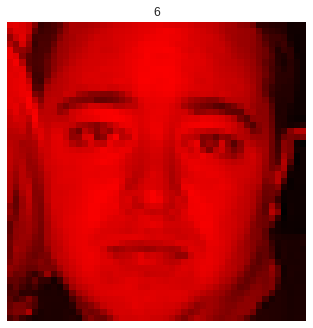

In [0]:
print('predicted : '+ str(label_dict[preds[75]]))
readImg(X_tests[75]/255.0,Y_test[75])

predicted : happiness


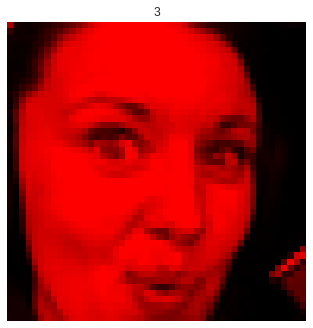

In [0]:
print('predicted : '+ str(label_dict[preds[105]]))
readImg(X_tests[105]/255.0,Y_test[105])